In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sys
sys.version

'3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:59:51) [MSC v.1914 64 bit (AMD64)]'

In [2]:
df = pd.read_csv('train.csv')
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [3]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df[df.isnull().any(axis=1)]
# We dropped these as there was no correlation between the values with nas and any other factor. 
# It was simply random and missing. there were only 310 rows missing so we thought it would not impact our dataset
df = df.dropna()

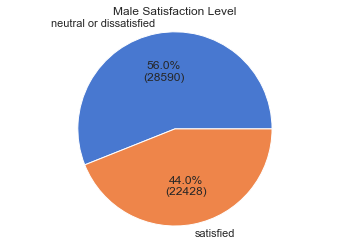

In [5]:
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
df_gender = df[['Gender', 'satisfaction']]
df_gender

df_male = df_gender.loc[df['Gender'] == 'Male']
df_female = df_gender.loc[df['Gender'] == 'Female']
df_male.value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
sns.set_theme(style="white", palette = 'muted')
male = df_male['satisfaction'].value_counts()
plt.pie(male,labels = male.index, autopct=autopct_format(male))
plt.title('Male Satisfaction Level')
plt.axis('equal')
plt.show()

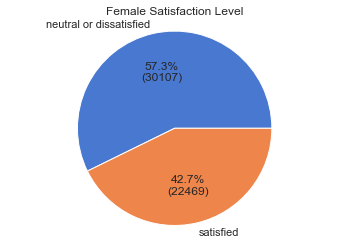

In [6]:
sns.set_theme(style="white", palette = 'muted')
female = df_female['satisfaction'].value_counts()
plt.pie(female,labels = female.index, autopct=autopct_format(female))
plt.title('Female Satisfaction Level')
plt.axis('equal')
plt.show()

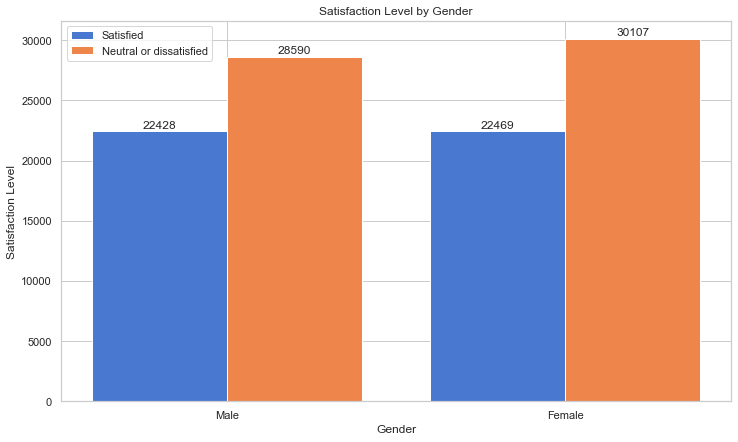

In [7]:
X = ['Male', 'Female'] 
satisfied = [22428,22469] 
unsatisfied = [28590, 30107] 
  
X_axis = np.arange(len(X)) 

sns.set_theme(style="whitegrid", palette = 'muted')
plt.figure(figsize=(12,7))
  
p1 = plt.bar(X_axis - 0.2, satisfied, 0.4, label = 'Satisfied') 
p2 = plt.bar(X_axis + 0.2, unsatisfied, 0.4, label = 'Neutral or dissatisfied')

for p in p1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
for p in p2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')


# for rect1 in p1:
#     height = rect1.get_height()
#     plt.annotate( "{}%".format(height/),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=11)
    
# for rect1 in p2:
#     height = rect1.get_height()
#     plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=11)

plt.xticks(X_axis, X) 
plt.xlabel("Gender") 
plt.ylabel("Satisfaction Level") 
plt.title("Satisfaction Level by Gender") 
plt.legend(loc = 'upper left') 
plt.show() 

Optimum level of cleanliness

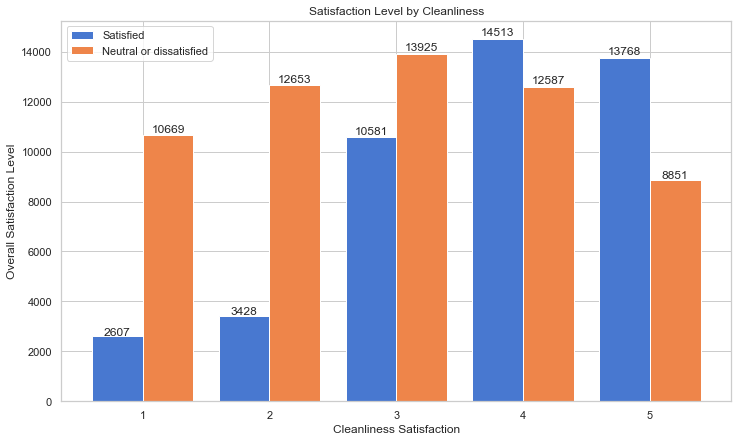

In [8]:
X = [1,2,3,4,5] 
satisfied = [2607, 3428, 10581, 14513, 13768] 
unsatisfied = [10669, 12653, 13925, 12587, 8851] 

X_axis = np.arange(len(X)) 

sns.set_theme(style="whitegrid", palette = 'muted')
plt.figure(figsize=(12,7))
  
p1 = plt.bar(X_axis - 0.2, satisfied, 0.4, label = 'Satisfied') 
p2 = plt.bar(X_axis + 0.2, unsatisfied, 0.4, label = 'Neutral or dissatisfied')

for p in p1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
for p in p2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')
    
plt.xticks(X_axis, X) 
plt.xlabel("Cleanliness Satisfaction") 
plt.ylabel("Overall Satisfaction Level") 
plt.title("Satisfaction Level by Cleanliness") 
plt.legend(loc = 'upper left') 
plt.show() 

In [9]:
# df.corr()
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,0,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,0,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,1,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [10]:
df["satisfaction"] = df["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied": 1})

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Arrival Delay in Minutes            -0.057582
Departure/Arrival time convenient   -0.051718
Departure Delay in Minutes          -0.050515
Gate location                        0.000449
Ease of Online booking               0.171507
Food and drink                       0.209659
Checkin service                      0.235914
Inflight service                     0.244852
Baggage handling                     0.247819
Inflight wifi service                0.284163
Flight Distance                      0.298915
Cleanliness                          0.305050
Leg room service                     0.313182
On-board service                     0.322450
Seat comfort                         0.349112
Inflight entertainment               0.398203
Online boarding                      0.503447
dtype: float64


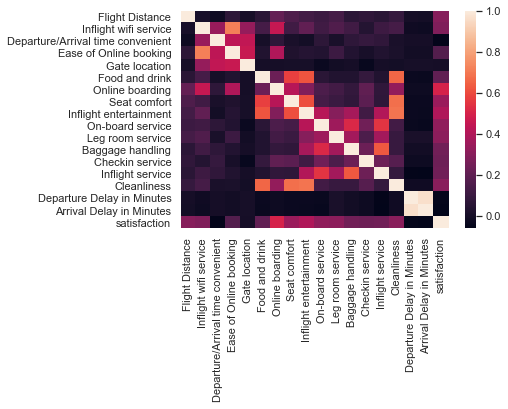

In [11]:
l = df.iloc[:, 5:-1].corrwith(df['satisfaction']).sort_values()
print(l)
heat = sns.heatmap(df.iloc[:, 5:].corr())

## What to do
 - By age group what is the most important factor / age ratings - Shaf
 - Factors that become least or more important depending on flight time/duration - Katherine
 - Loyal vs nonloyal customer ratings - Katherine
 - Gender ratings - Agathe
 - What is the optimum level of cleanliness/food & drink/inflight service: are people satisfied with 3 - All
 - Report - All
 - If extra time: find another dataset which has flight times and make a graph


## Limitations
- Price is not included
- Time of flight is not included, set as convenient or not


In [12]:
df["Customer Type"] = df["Customer Type"].replace({"Loyal Customer": 1, "disloyal Customer": 0})
df["Type of Travel"] = df["Type of Travel"].replace({"Personal Travel": 0, "Business travel": 1})
df["Class"] = df["Class"].replace({"Eco": 1, "Eco Plus": 2, "Business": 3})
df

c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\agath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,3,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,3,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,3,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,3,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,3,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,3,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


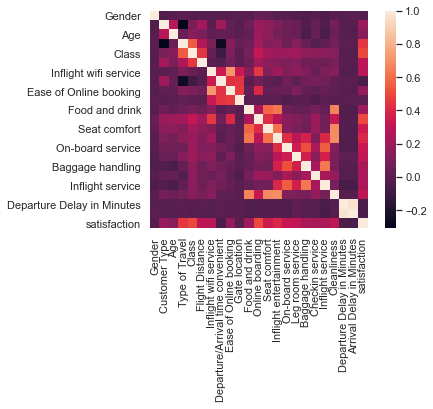

In [13]:
cor = df.corr()
sns.heatmap(cor, square = True)
plt.show()

In [14]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

df = df.sample(n = 33000)
X = df.sample(n = 33000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

model = cluster.AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="cosine")

# Once created, now we can fit the model to the data
model.fit(df)

AgglomerativeClustering(affinity='cosine', linkage='complete')

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
print("Silhouette Coefficient:", metrics.silhouette_score(df, model.labels_))

# We can also calculate the calinski_harabasz_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(df, model.labels_))

Silhouette Coefficient: -0.16643157966542552
Calinski_harabasz Coefficient: 397.68081804363123


In [16]:
print("Completeness score", metrics.completeness_score(df['satisfaction'], model.labels_))
print("Homogeneity score", metrics.homogeneity_score(df['satisfaction'], model.labels_))

Completeness score 0.017025129207607452
Homogeneity score 0.0019008641648456412


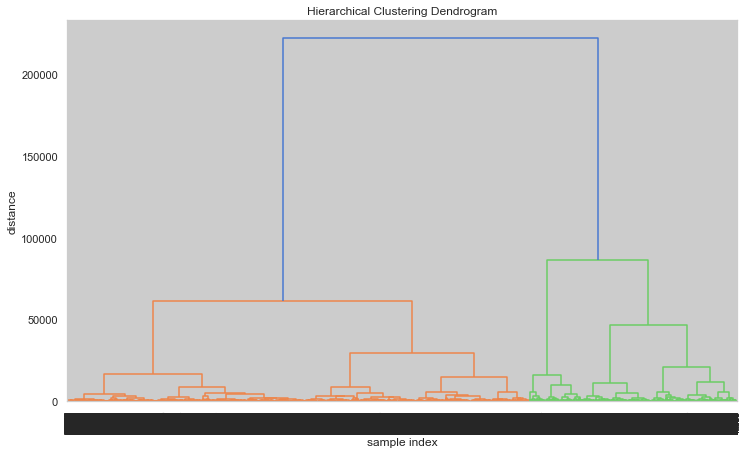

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# in this example, we are using ward as linkage as it is more appropriate for this dataset
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
model = linkage(df, 'ward')

# we can increase the size of the graph, if needed
plt.figure(figsize=(12,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90., leaf_font_size=8.,)
plt.show()